In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("income1.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

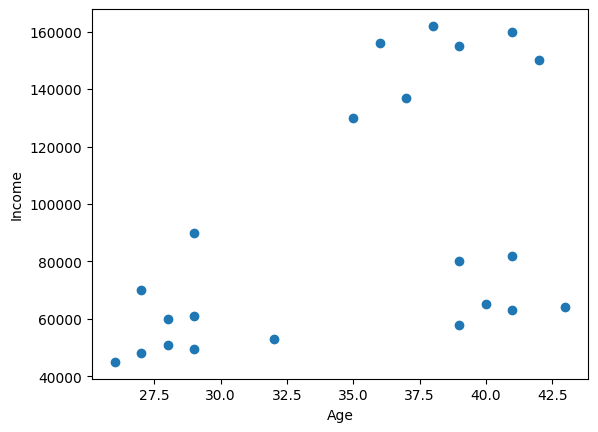

In [5]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [6]:
km= KMeans(n_clusters=3)
y_predicted= km.fit_predict(df[['Age','Income($)']])
print(y_predicted)

[2 2 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 2 0]


In [7]:
df['cluster']= y_predicted

df.head(20)

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [8]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

/tmp/ipython-input-911928727.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


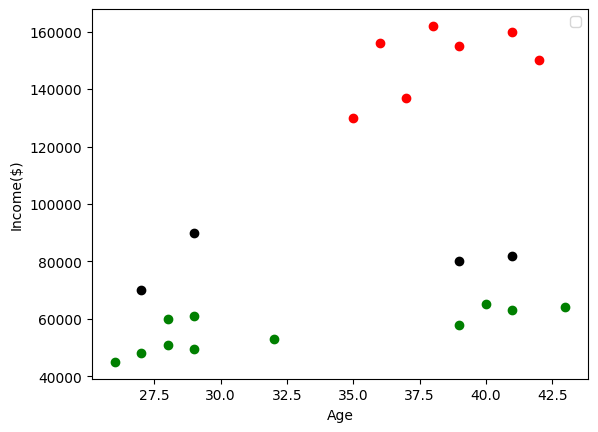

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='red')
plt.scatter(df3.Age,df3['Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [11]:
# Preprocessing using min max scaler

df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [14]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] =  scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] =  scaler.transform(df[['Age']])

In [15]:
df.head()

,Name,Age,Income($),cluster,Age)
0,Rob,0.058824,0.213675,2,0.058824
1,Michael,0.176471,0.384615,2,0.176471
2,Mohan,0.176471,0.136752,0,0.176471
3,Ismail,0.117647,0.128205,0,0.117647
4,Kory,0.941176,0.897436,1,0.941176


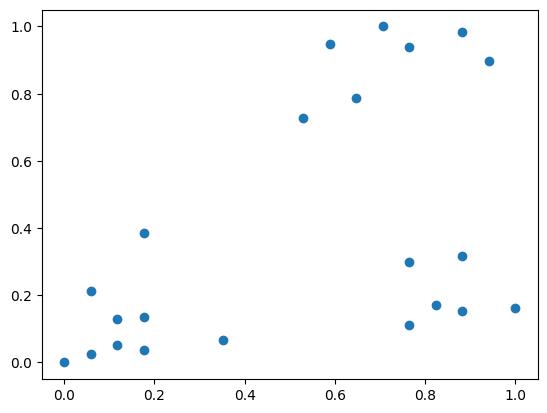

In [16]:
plt.scatter(df.Age,df['Income($)'])

In [17]:
km= KMeans(n_clusters=3)
y_predicted= km.fit_predict(df[['Age','Income($)']])
print(y_predicted)

[1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1 0 0 0 0 0 0]


In [18]:
df['clister']= y_predicted
df.head()

,Name,Age,Income($),cluster,Age),clister
0,Rob,0.058824,0.213675,2,0.058824,1
1,Michael,0.176471,0.384615,2,0.176471,1
2,Mohan,0.176471,0.136752,0,0.176471,1
3,Ismail,0.117647,0.128205,0,0.117647,1
4,Kory,0.941176,0.897436,1,0.941176,2


/tmp/ipython-input-1633518392.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


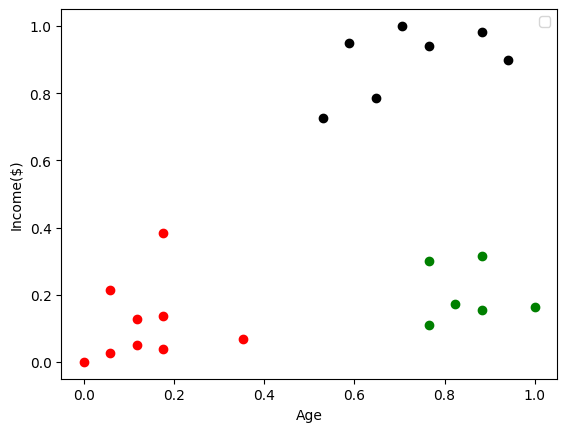

In [20]:
df1 = df[df.clister==0]
df2 = df[df.clister==1]
df3 = df[df.clister==2]
plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='red')
plt.scatter(df3.Age,df3['Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [22]:
# Elbow method

sse=[]

k_rng= range(1,10)
for k in k_rng:
  km= KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)



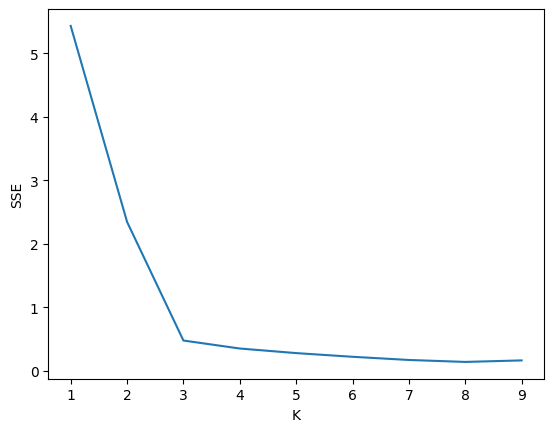

In [23]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng, sse)